In [1]:
!pip install demoji

In [2]:
!pip install emoji

In [3]:
import re
import regex
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import nltk
import calendar
import datetime
import string
import demoji
import emoji

import warnings
warnings.filterwarnings('ignore')

In [4]:
demoji.download_codes()

... OK (Got response in 0.23 seconds)
Writing emoji data to /root/.demoji/codes.json ...
... OK


In [5]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Reading Chat 1

In [7]:
df1 = pd.read_csv('WA_Mansha1.txt', sep='\n', header=None)
df1.head()

,0
0,"20/10/2020, 11:29 - Messages and calls are end..."
1,"20/10/2020, 11:29 - Hrisav: sir is looking for u"
2,"20/10/2020, 11:36 - Mansha 1: opp"
3,"20/10/2020, 11:37 - Mansha 1: yar net kat gaya"
4,"20/10/2020, 11:38 - Hrisav: sir ko txt kr diyo..."


In [8]:
df1[0]

0       20/10/2020, 11:29 - Messages and calls are end...
1        20/10/2020, 11:29 - Hrisav: sir is looking for u
2                       20/10/2020, 11:36 - Mansha 1: opp
3          20/10/2020, 11:37 - Mansha 1: yar net kat gaya
4       20/10/2020, 11:38 - Hrisav: sir ko txt kr diyo...
                              ...                        
1963                     19/02/2021, 23:32 - Mansha 1: 🙏🙏
1964    20/02/2021, 09:33 - Mansha 1: Psychometric seg...
1965          20/02/2021, 09:53 - Hrisav: <Media omitted>
1966                     20/02/2021, 10:31 - Mansha 1: 🙏🙏
1967    20/02/2021, 14:12 - Mansha 1 changed their pho...
Name: 0, Length: 1968, dtype: object

In [9]:
df1[0].map(lambda x: x[20:])

0       Messages and calls are end-to-end encrypted. N...
1                            Hrisav: sir is looking for u
2                                           Mansha 1: opp
3                              Mansha 1: yar net kat gaya
4       Hrisav: sir ko txt kr diyo,, else firse class ...
                              ...                        
1963                                         Mansha 1: 🙏🙏
1964    Mansha 1: Psychometric segmentation likhe ho kya?
1965                              Hrisav: <Media omitted>
1966                                         Mansha 1: 🙏🙏
1967    Mansha 1 changed their phone number to a new n...
Name: 0, Length: 1968, dtype: object

In [10]:
message = df1[0].map(lambda x: x[20:])
df1_full = pd.DataFrame(message.str.split(': ',1).tolist(), columns = ['Name','Message'])

df1_full.head()

,Name,Message
0,Messages and calls are end-to-end encrypted. N...,None
1,Hrisav,sir is looking for u
2,Mansha 1,opp
3,Mansha 1,yar net kat gaya
4,Hrisav,"sir ko txt kr diyo,, else firse class ke baad ..."


In [11]:
date = df1[0].map(lambda x: x[:10])
df1_full['Date'] = date
df1_full.head()

,Name,Message,Date
0,Messages and calls are end-to-end encrypted. N...,None,20/10/2020
1,Hrisav,sir is looking for u,20/10/2020
2,Mansha 1,opp,20/10/2020
3,Mansha 1,yar net kat gaya,20/10/2020
4,Hrisav,"sir ko txt kr diyo,, else firse class ke baad ...",20/10/2020


In [12]:
time = df1[0].map(lambda x: x[12:18])
df1_full['Time'] = time
df1_full.head()

,Name,Message,Date,Time
0,Messages and calls are end-to-end encrypted. N...,None,20/10/2020,11:29
1,Hrisav,sir is looking for u,20/10/2020,11:29
2,Mansha 1,opp,20/10/2020,11:36
3,Mansha 1,yar net kat gaya,20/10/2020,11:37
4,Hrisav,"sir ko txt kr diyo,, else firse class ke baad ...",20/10/2020,11:38


In [13]:
df1_full.shape

(1968, 4)

## Reading Chat 2

In [14]:
df2 = pd.read_csv('WA_Mansha2.txt', sep='\n', header=None)
df2.head()

,0
0,"20/02/2021, 14:12 - Messages and calls are end..."
1,"20/02/2021, 14:12 - Mansha 1 changed their pho..."
2,"20/02/2021, 20:50 - Mansha 2: Aml Ka topics Ky..."
3,"20/02/2021, 21:24 - Hrisav: Full topic hai mansha"
4,"20/02/2021, 21:24 - Hrisav: From start of seco..."


In [15]:
message = df2[0].map(lambda x: x[20:])
df2_full = pd.DataFrame(message.str.split(': ',1).tolist(), columns = ['Name','Message'])

df2_full.head()

,Name,Message
0,Messages and calls are end-to-end encrypted. N...,None
1,Mansha 1 changed their phone number. You're cu...,None
2,Mansha 2,Aml Ka topics Kya h Plez batana
3,Hrisav,Full topic hai mansha
4,Hrisav,From start of second sem


In [16]:
date = df2[0].map(lambda x: x[:10])
df2_full['Date'] = date
df2_full.head()

,Name,Message,Date
0,Messages and calls are end-to-end encrypted. N...,None,20/02/2021
1,Mansha 1 changed their phone number. You're cu...,None,20/02/2021
2,Mansha 2,Aml Ka topics Kya h Plez batana,20/02/2021
3,Hrisav,Full topic hai mansha,20/02/2021
4,Hrisav,From start of second sem,20/02/2021


In [17]:
time = df2[0].map(lambda x: x[12:18])
df2_full['Time'] = time
df2_full.head()

,Name,Message,Date,Time
0,Messages and calls are end-to-end encrypted. N...,None,20/02/2021,14:12
1,Mansha 1 changed their phone number. You're cu...,None,20/02/2021,14:12
2,Mansha 2,Aml Ka topics Kya h Plez batana,20/02/2021,20:50
3,Hrisav,Full topic hai mansha,20/02/2021,21:24
4,Hrisav,From start of second sem,20/02/2021,21:24


In [18]:
df2_full.shape

(7593, 4)

## Merging both Files

In [19]:
df_full = df1_full.append(df2_full, ignore_index = True)
df_full.head()

,Name,Message,Date,Time
0,Messages and calls are end-to-end encrypted. N...,None,20/10/2020,11:29
1,Hrisav,sir is looking for u,20/10/2020,11:29
2,Mansha 1,opp,20/10/2020,11:36
3,Mansha 1,yar net kat gaya,20/10/2020,11:37
4,Hrisav,"sir ko txt kr diyo,, else firse class ke baad ...",20/10/2020,11:38


In [20]:
df_full.shape

(9561, 4)

## Pre-processing

In [21]:
df_full['Name'].value_counts()

Hrisav                            5113
Mansha 2                          3392
Mansha 1                           791
                                   120
total[month==m]                      2
                                  ... 
 baat hai                            1
gi si                                1
se)                                  1
 4111                                1
 #rounded off time by tortoise       1
Name: Name, Length: 135, dtype: int64

In [22]:
df_full.loc[~df_full['Name'].isin(['Mansha 1','Mansha 2','Hrisav'])]

,Name,Message,Date,Time
0,Messages and calls are end-to-end encrypted. N...,None,20/10/2020,11:29
56,art,None,Rdbms - di,nsions
57,,None,Mml - calc,as
58,,None,Mr - full,
59,,None,Dvst - tab,au
...,...,...,...,...
9405,,None,18-24,
9422,,None,ye kro peh,dekhk
9527,961015518?pwd=QWxUckZjWk10UVFSdlI2eDRBMm9iQT09,None,https://zo,.us/j/
9528,5518,None,Meeting ID,979 61


Need to clear out the junk messages, and keep the messages where sender is Hrisav / Mansha 1 / Mansha 2.

In [23]:
df_full = df_full[(df_full['Name']=='Mansha 1') | (df_full['Name']=='Mansha 2') | (df_full['Name']=='Hrisav')]
df_full.shape

(9296, 4)

Remove whichever messages have 'Media omitted' option. These were basically audios/videos/photos/etc.

In [24]:
df_full[df_full['Message']=='<Media omitted>'].head()

,Name,Message,Date,Time
97,Hrisav,<Media omitted>,03/12/2020,18:21
126,Hrisav,<Media omitted>,10/12/2020,17:20
127,Hrisav,<Media omitted>,10/12/2020,17:20
148,Hrisav,<Media omitted>,11/12/2020,20:28
149,Hrisav,<Media omitted>,11/12/2020,20:32


In [25]:
df_clean = df_full[(df_full['Message'] != '<Media omitted>')]
df_clean.shape

(8835, 4)

In [26]:
df_clean['Name'] = df_clean['Name'].replace(['Mansha 1', 'Mansha 2'],'Mansha')
df_clean['Name'].value_counts()

Hrisav    4759
Mansha    4076
Name: Name, dtype: int64

In [27]:
df_clean.dtypes

Name       object
Message    object
Date       object
Time       object
dtype: object

## Handling Time

Let's look at Time.. it has a trailing space. Need to remove that.

In [28]:
df_clean['Time'][0:][1]

'11:29 '

In [29]:
df_clean['Time'] = df_clean['Time'].apply(lambda x: x.rstrip())
df_clean['Time'][0:][1]

'11:29'

In [30]:
df_clean['Hour'] = pd.to_datetime(df_clean['Time'], format='%H:%M').dt.hour

In [31]:
df_clean['Period'] = pd.cut(df_clean['Hour'], 
                    bins=[0,6,12,18,24], 
                    include_lowest=True, 
                    labels=['Night','Morning','Afternoon','Evening'])
df_clean.head()

,Name,Message,Date,Time,Hour,Period
1,Hrisav,sir is looking for u,20/10/2020,11:29,11,Morning
2,Mansha,opp,20/10/2020,11:36,11,Morning
3,Mansha,yar net kat gaya,20/10/2020,11:37,11,Morning
4,Hrisav,"sir ko txt kr diyo,, else firse class ke baad ...",20/10/2020,11:38,11,Morning
5,Mansha,k k.. thanks,20/10/2020,11:38,11,Morning


## Handling Date

In [32]:
df_clean['Day'] = [d.split('/')[0] for d in df_clean['Date']]
df_clean['Month'] = [d.split('/')[1] for d in df_clean['Date']]
df_clean['Year'] = [d.split('/')[2] for d in df_clean['Date']]

df_clean['Day'] = df_clean['Day'].astype('int64')
df_clean['Month'] = df_clean['Month'].astype('int64')
df_clean['Year'] = df_clean['Year'].astype('int64')

In [33]:
week_days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
list_week_days = []

for ind in df_clean.index:
     weekday = calendar.weekday(df_clean['Year'][ind], df_clean['Month'][ind], df_clean['Day'][ind])
     list_week_days.append(week_days[weekday])

df_clean['DayofWeek'] = list_week_days

In [34]:
df_clean.head()

,Name,Message,Date,Time,Hour,Period,Day,Month,Year,DayofWeek
1,Hrisav,sir is looking for u,20/10/2020,11:29,11,Morning,20,10,2020,Tuesday
2,Mansha,opp,20/10/2020,11:36,11,Morning,20,10,2020,Tuesday
3,Mansha,yar net kat gaya,20/10/2020,11:37,11,Morning,20,10,2020,Tuesday
4,Hrisav,"sir ko txt kr diyo,, else firse class ke baad ...",20/10/2020,11:38,11,Morning,20,10,2020,Tuesday
5,Mansha,k k.. thanks,20/10/2020,11:38,11,Morning,20,10,2020,Tuesday


## Handling Month

In [35]:
months = {
     1 : 'Jan',
     2 : 'Feb',
     3 : 'Mar',
     4 : 'Apr',
     5 : 'May',
     6 : 'Jun',
     7 : 'Jul',
     8 : 'Aug',
     9 : 'Sep',
    10 : 'Oct',
    11 : 'Nov',
    12 : 'Dec'
}
df_clean['Month'] = df_clean['Month'].apply(lambda x: months[x])

In [36]:
df_clean['Month_Year'] = df_clean['Month'].map(str) + ' ' + df_clean['Year'].map(str)
df_clean.head()

,Name,Message,Date,Time,Hour,Period,Day,Month,Year,DayofWeek,Month_Year
1,Hrisav,sir is looking for u,20/10/2020,11:29,11,Morning,20,Oct,2020,Tuesday,Oct 2020
2,Mansha,opp,20/10/2020,11:36,11,Morning,20,Oct,2020,Tuesday,Oct 2020
3,Mansha,yar net kat gaya,20/10/2020,11:37,11,Morning,20,Oct,2020,Tuesday,Oct 2020
4,Hrisav,"sir ko txt kr diyo,, else firse class ke baad ...",20/10/2020,11:38,11,Morning,20,Oct,2020,Tuesday,Oct 2020
5,Mansha,k k.. thanks,20/10/2020,11:38,11,Morning,20,Oct,2020,Tuesday,Oct 2020


## Adding Message Length

In [37]:
df_clean['Msg_Length'] = df_clean['Message'].str.len()
df_clean.head()

,Name,Message,Date,Time,Hour,Period,Day,Month,Year,DayofWeek,Month_Year,Msg_Length
1,Hrisav,sir is looking for u,20/10/2020,11:29,11,Morning,20,Oct,2020,Tuesday,Oct 2020,20
2,Mansha,opp,20/10/2020,11:36,11,Morning,20,Oct,2020,Tuesday,Oct 2020,3
3,Mansha,yar net kat gaya,20/10/2020,11:37,11,Morning,20,Oct,2020,Tuesday,Oct 2020,16
4,Hrisav,"sir ko txt kr diyo,, else firse class ke baad ...",20/10/2020,11:38,11,Morning,20,Oct,2020,Tuesday,Oct 2020,73
5,Mansha,k k.. thanks,20/10/2020,11:38,11,Morning,20,Oct,2020,Tuesday,Oct 2020,12


In [38]:
df_clean.dtypes

Name            object
Message         object
Date            object
Time            object
Hour             int64
Period        category
Day              int64
Month           object
Year             int64
DayofWeek       object
Month_Year      object
Msg_Length       int64
dtype: object

In [39]:
df_clean.shape

(8835, 12)

In [40]:
df_clean.isnull().sum()

Name          0
Message       0
Date          0
Time          0
Hour          0
Period        0
Day           0
Month         0
Year          0
DayofWeek     0
Month_Year    0
Msg_Length    0
dtype: int64

In [41]:
df_clean = df_clean.reset_index(drop=True)
df_clean.tail()

,Name,Message,Date,Time,Hour,Period,Day,Month,Year,DayofWeek,Month_Year,Msg_Length
8830,Hrisav,Chl rha hai nahane 😂😂,13/05/2021,19:26,19,Evening,13,May,2021,Thursday,May 2021,21
8831,Mansha,Lol,13/05/2021,19:30,19,Evening,13,May,2021,Thursday,May 2021,3
8832,Hrisav,Ye lo,13/05/2021,19:51,19,Evening,13,May,2021,Thursday,May 2021,5
8833,Hrisav,Dahi vada,13/05/2021,19:51,19,Evening,13,May,2021,Thursday,May 2021,9
8834,Mansha,Wah wah,13/05/2021,19:58,19,Evening,13,May,2021,Thursday,May 2021,7


## EDA

### Text exchanges on 1st JAN?

In [42]:
df_clean[df_clean['Date']=='01/01/2021']

,Name,Message,Date,Time,Hour,Period,Day,Month,Year,DayofWeek,Month_Year,Msg_Length
296,Hrisav,happy new year 🤘🤘😀,01/01/2021,22:58,22,Evening,1,Jan,2021,Friday,Jan 2021,18
297,Mansha,Same to u Hrisav...,01/01/2021,23:06,23,Evening,1,Jan,2021,Friday,Jan 2021,19


### Total messages sent? Who sent how many?

In [43]:
total = len(df_clean)
print('Number of texts exchanged among us: ', total)

Number of texts exchanged among us:  8835


In [44]:
c = df_clean['Name'].value_counts(dropna=False)
p = df_clean['Name'].value_counts(dropna=False, normalize=True)

pd.concat([c,round(p*100,2)], axis=1, keys=['counts', '%'])

,counts,%
Hrisav,4759,53.87
Mansha,4076,46.13


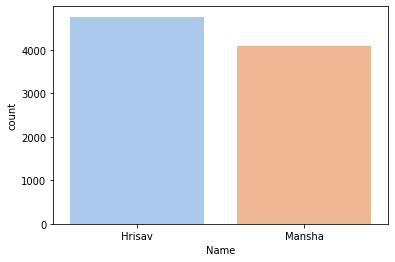

In [45]:
sns.set_palette('pastel')
sns.countplot(df_clean['Name'])

I am slightly ahead as of now :)

### Avg length of texts

In [46]:
print('Our combined avg length of texts: ', round(df_clean['Msg_Length'].mean(), 2))

Our combined avg length of texts:  20.06


In [47]:
print('Avg length of texts by Me: ', round(df_clean[df_clean['Name']=='Hrisav']['Msg_Length'].mean(), 2))

Avg length of texts by Me:  20.09


In [48]:
print('Avg length of texts by Mansha: ', round(df_clean[df_clean['Name']=='Mansha']['Msg_Length'].mean(), 2))

Avg length of texts by Mansha:  20.03


### How many times we talked about Corona?

In [49]:
search_words = ['corona', 'Corona']
df_clean[df_clean['Message'].str.contains('|'.join(search_words))]

,Name,Message,Date,Time,Hour,Period,Day,Month,Year,DayofWeek,Month_Year,Msg_Length
2367,Mansha,Hahaha is bc corona ne Jina Muskil or liya,15/03/2021,23:52,23,Evening,15,Mar,2021,Monday,Mar 2021,42
2386,Mansha,Corona yar pura watt laga dala,15/03/2021,23:56,23,Evening,15,Mar,2021,Monday,Mar 2021,30
4053,Mansha,Isbar solo jaungi if this corona thik ho gya na,08/04/2021,01:52,1,Night,8,Apr,2021,Thursday,Apr 2021,47
5258,Hrisav,Wish corona wsnt there,12/04/2021,12:39,12,Morning,12,Apr,2021,Monday,Apr 2021,22
5822,Mansha,Fir corona ka scene nhi hua toh den done aur b...,14/04/2021,16:50,16,Afternoon,14,Apr,2021,Wednesday,Apr 2021,60
5823,Hrisav,Corona toh brte jaenge,14/04/2021,16:50,16,Afternoon,14,Apr,2021,Wednesday,Apr 2021,22
5909,Mansha,Pray karo na corona chala jye,14/04/2021,20:47,20,Evening,14,Apr,2021,Wednesday,Apr 2021,29


### Day of Week message summary

In [50]:
df_clean.groupby(['DayofWeek']).size()

DayofWeek
Friday       1426
Monday       1184
Saturday      911
Sunday        867
Thursday     1456
Tuesday      1469
Wednesday    1522
dtype: int64

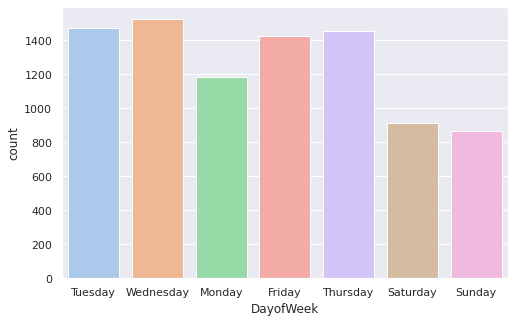

In [51]:
sns.set(rc={'figure.figsize':(8,5)})
sns.set_palette('pastel')
sns.countplot(df_clean['DayofWeek'])

We don't talk much on weekends, and it's evident too from the graph. Well, Tuesday to Friday seems to be our talkative day! Mid week lethargy from studies could be a reason.

### Which hour we text the most?

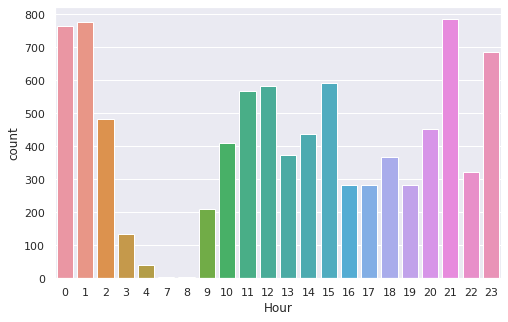

In [52]:
sns.set_palette('pastel')
sns.countplot(df_clean['Hour'])

Seems like we converse most post midnight!

### Day of week vs Time of day

In [53]:
tab = df_clean.groupby(['Hour', 'DayofWeek'])['Message'].size().reset_index()
tab.head()

,Hour,DayofWeek,Message
0,0,Friday,81
1,0,Monday,97
2,0,Saturday,64
3,0,Sunday,233
4,0,Thursday,87


In [54]:
pivot_tab = tab.pivot('Hour', 'DayofWeek', 'Message')
pivot_tab

DayofWeek,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Hour,,,,,,,
0,81.0,97.0,64.0,233.0,87.0,149.0,52.0
1,122.0,92.0,54.0,9.0,318.0,152.0,30.0
2,1.0,20.0,150.0,68.0,234.0,4.0,5.0
3,13.0,11.0,42.0,40.0,NaN,26.0,1.0
4,2.0,1.0,23.0,10.0,3.0,2.0,NaN
7,NaN,NaN,4.0,NaN,NaN,NaN,NaN
8,1.0,NaN,NaN,NaN,NaN,2.0,NaN
9,39.0,38.0,13.0,3.0,12.0,19.0,85.0
10,82.0,35.0,53.0,11.0,70.0,66.0,94.0


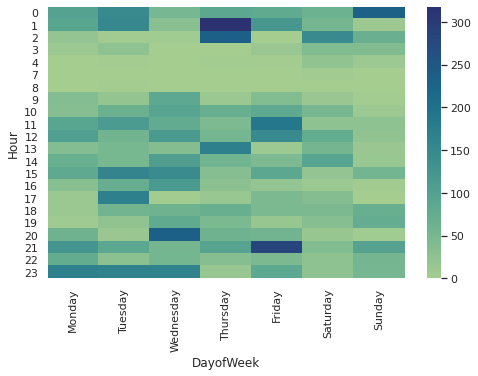

In [55]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.heatmap(pivot_tab[days].fillna(0), cmap='crest')

Heatmap shows 'Hour of the Day' vs 'Day of the Week' shades. Lighter shades prevalent on the morning time throughout the week, as we generally wake up post 9 AM :) 

### Month wise message summary

In [56]:
df_clean.groupby(['Year','Month']).size()

Year  Month
2020  Dec       228
      Nov        45
      Oct        23
2021  Apr      5067
      Feb      1134
      Jan       588
      Mar       786
      May       964
dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

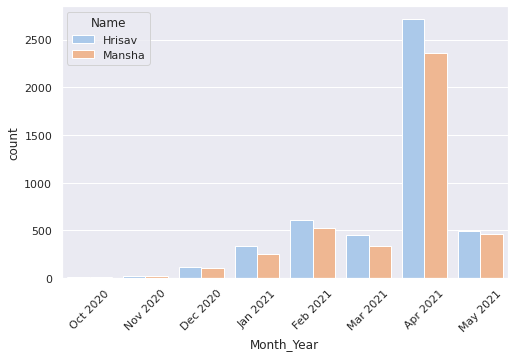

In [57]:
sns.set_palette('pastel')
sns.countplot(x ='Month_Year', hue = 'Name', data = df_clean)
plt.xticks(rotation=45)

Hmm.. so the spike has been in April!

### Which period of day we text most?

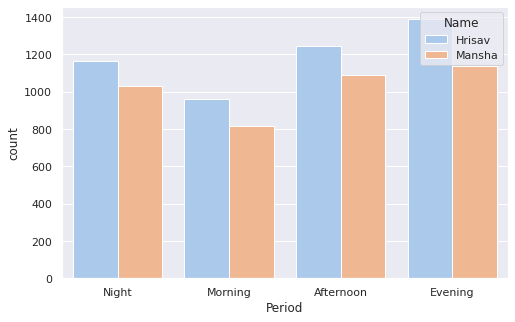

In [58]:
sns.set_palette('pastel')
sns.countplot(x ='Period', hue = 'Name', data = df_clean)

### Which were the top 10 active days?

In [59]:
dates = df_clean.groupby(['Date']).size()
type(dates)

pandas.core.series.Series

In [60]:
dates = dates.to_frame()
dates.head()

,0
Date,
01/01/2021,2
01/04/2021,7
01/05/2021,90
02/02/2021,19
02/04/2021,220


In [61]:
dates = dates.rename(columns = {0:'Count'})
dates = dates.reset_index()
dates.head()

,Date,Count
0,01/01/2021,2
1,01/04/2021,7
2,01/05/2021,90
3,02/02/2021,19
4,02/04/2021,220


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

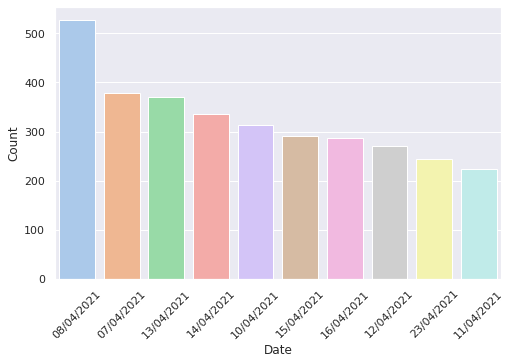

In [62]:
dates = dates.sort_values(by=['Count'],ascending=False).head(10)
sns.barplot(x = 'Date', y = 'Count', data = dates)
plt.xticks(rotation=45)

500+ texts on 8th April! Goodness.. need to find out what was special!

In [63]:
df_clean[df_clean['Date']=='08/04/2021']

,Name,Message,Date,Time,Hour,Period,Day,Month,Year,DayofWeek,Month_Year,Msg_Length
3820,Hrisav,Sabko itna jldi kiu hai,08/04/2021,00:00,0,Night,8,Apr,2021,Thursday,Apr 2021,23
3821,Mansha,Wahi,08/04/2021,00:00,0,Night,8,Apr,2021,Thursday,Apr 2021,4
3822,Mansha,Tum bhi kar lo,08/04/2021,00:24,0,Night,8,Apr,2021,Thursday,Apr 2021,14
3823,Hrisav,Mera 2023,08/04/2021,00:28,0,Night,8,Apr,2021,Thursday,Apr 2021,9
3824,Mansha,same same,08/04/2021,00:29,0,Night,8,Apr,2021,Thursday,Apr 2021,9
...,...,...,...,...,...,...,...,...,...,...,...,...
4343,Mansha,thanku 😇\,08/04/2021,16:01,16,Afternoon,8,Apr,2021,Thursday,Apr 2021,9
4344,Hrisav,chaap,08/04/2021,16:02,16,Afternoon,8,Apr,2021,Thursday,Apr 2021,5
4345,Mansha,Sticker man,08/04/2021,21:02,21,Evening,8,Apr,2021,Thursday,Apr 2021,11
4346,Mansha,Good One!!,08/04/2021,21:08,21,Evening,8,Apr,2021,Thursday,Apr 2021,10


### Distribution of Message Length

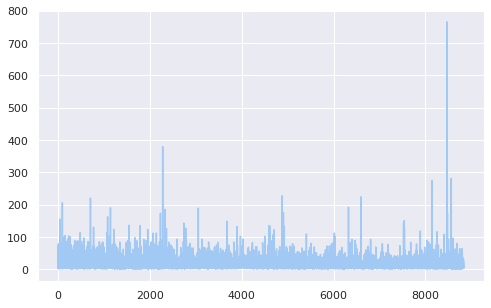

In [64]:
sns.set_palette('pastel')
df_clean['Msg_Length'].plot.line()

In [65]:
df_clean['Msg_Length'].max()

765

In [66]:
df_clean[df_clean['Msg_Length']==765]

,Name,Message,Date,Time,Hour,Period,Day,Month,Year,DayofWeek,Month_Year,Msg_Length
8463,Hrisav,We extensively use R-Shiny and Python-Bokeh/Da...,09/05/2021,02:27,2,Night,9,May,2021,Sunday,May 2021,765


([], <a list of 0 Text major ticklabel objects>)

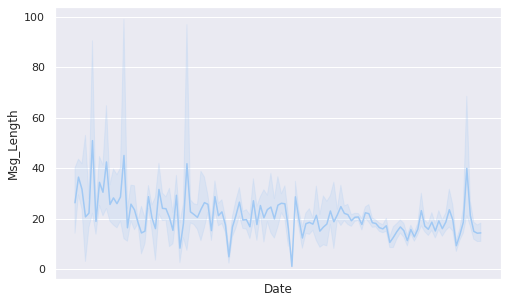

In [67]:
sns.lineplot(df_clean['Date'], df_clean['Msg_Length'])
plt.xticks([])

Initial phase shows lengthier texts were exchanged between us.

### Who called whom more?

In [68]:
searchfor = ['Mansh', 'mansh']
op = df_clean[df_clean['Message'].str.contains('|'.join(searchfor))].shape[0]

print(f'I called her {op} times.')

I called her 122 times.


In [69]:
searchfor = ['Hrisa', 'hrisa']
op = df_clean[df_clean['Message'].str.contains('|'.join(searchfor))].shape[0]

print(f'She called me {op} times.')

She called me 68 times.


### Emojis

In [70]:
df_clean[df_clean['Message'].str.contains('🤣')].tail()

,Name,Message,Date,Time,Hour,Period,Day,Month,Year,DayofWeek,Month_Year,Msg_Length
8314,Hrisav,🤣🤣,07/05/2021,00:06,0,Night,7,May,2021,Friday,May 2021,2
8367,Hrisav,🤣🤣🤣,07/05/2021,12:31,12,Morning,7,May,2021,Friday,May 2021,3
8621,Hrisav,🤣,10/05/2021,22:02,22,Evening,10,May,2021,Monday,May 2021,1
8649,Hrisav,🤣🤣🤣,11/05/2021,00:25,0,Night,11,May,2021,Tuesday,May 2021,3
8739,Mansha,🤣🤣,12/05/2021,00:01,0,Night,12,May,2021,Wednesday,May 2021,2


In [71]:
df_clean['Emoji_Name'] = [str(list(demoji.findall(str(df_clean.loc[i,'Message'])).values())) for i in range(len(df_clean))]
df_clean['Emoji'] = [str(list(demoji.findall(str(df_clean.loc[i,'Message'])).keys())) for i in range(len(df_clean))]

In [72]:
df_clean[df_clean['Message'].str.contains('🤣')].head()

,Name,Message,Date,Time,Hour,Period,Day,Month,Year,DayofWeek,Month_Year,Msg_Length,Emoji_Name,Emoji
3,Hrisav,"sir ko txt kr diyo,, else firse class ke baad ...",20/10/2020,11:38,11,Morning,20,Oct,2020,Tuesday,Oct 2020,73,['rolling on the floor laughing'],['🤣']
9,Hrisav,oohoo 🤣,20/10/2020,12:38,12,Morning,20,Oct,2020,Tuesday,Oct 2020,7,['rolling on the floor laughing'],['🤣']
190,Hrisav,🤣🤣🤣,19/12/2020,16:43,16,Afternoon,19,Dec,2020,Saturday,Dec 2020,3,['rolling on the floor laughing'],['🤣']
194,Hrisav,🤣🤣🤣,19/12/2020,16:49,16,Afternoon,19,Dec,2020,Saturday,Dec 2020,3,['rolling on the floor laughing'],['🤣']
212,Hrisav,dont worry tumhara placement ke baad treat lun...,20/12/2020,12:00,12,Morning,20,Dec,2020,Sunday,Dec 2020,61,['rolling on the floor laughing'],['🤣']


In [73]:
df_clean[df_clean['Message'].str.contains('❤')].head()

,Name,Message,Date,Time,Hour,Period,Day,Month,Year,DayofWeek,Month_Year,Msg_Length,Emoji_Name,Emoji
527,Mansha,🙏🙏Thanks ❤️❤️,11/01/2021,14:59,14,Afternoon,11,Jan,2021,Monday,Jan 2021,13,"['red heart', 'folded hands']","['❤️', '🙏']"
633,Mansha,thanku... ❤️❤️,17/01/2021,10:42,10,Morning,17,Jan,2021,Sunday,Jan 2021,14,['red heart'],['❤️']
695,Mansha,correct..Thanks❤️❤️,20/01/2021,20:35,20,Evening,20,Jan,2021,Wednesday,Jan 2021,19,['red heart'],['❤️']
700,Hrisav,❤️❤️✅✅,20/01/2021,20:44,20,Evening,20,Jan,2021,Wednesday,Jan 2021,6,"['check mark button', 'red heart']","['✅', '❤️']"
708,Mansha,Thanks❤️❤️.means alot,21/01/2021,18:39,18,Afternoon,21,Jan,2021,Thursday,Jan 2021,21,['red heart'],['❤️']


In [74]:
df_clean['Emoji'].value_counts()

[]            7698
['😅']          247
['😂']          157
['🤣']           98
['❤️']          86
              ... 
['😡']            1
['😇', '🙏']       1
['👌🏼']           1
['👎🏼']           1
['🏼', '🤝']       1
Name: Emoji, Length: 113, dtype: int64

Data shows emoji and num of messages it has appeared in.

In [75]:
df_mansha = df_clean[(df_clean['Name'] == 'Mansha')]
df_hrisav = df_clean[(df_clean['Name'] == 'Hrisav')]

In [76]:
emo_mansha = ['😅', '❤️', '😂', '😭', '🙏', '🙈', '🤣']
emo_mcount = []

for emo in emo_mansha:
  emo_mcount.append(len(df_mansha[df_mansha['Emoji'].str.contains(emo)]))

dic = {'Emoji':emo_mansha, 'M_Count':emo_mcount}
df_emo_mansha = pd.DataFrame(dic, columns = ['Emoji', 'M_Count'])
df_emo_mansha.sort_values(by=['M_Count'], ascending=False)

,Emoji,M_Count
0,😅,192
1,❤️,71
2,😂,50
3,😭,40
4,🙏,36
5,🙈,35
6,🤣,32


Mansha cries a lot, check the 4th row.. lol!

In [77]:
emo_hrisav = ['😅', '❤️', '😂', '🙏', '😏', '🤣', '😀']
emo_hcount = []

for emo in emo_hrisav:
  emo_hcount.append(len(df_hrisav[df_hrisav['Emoji'].str.contains(emo)]))

dic = {'Emoji':emo_hrisav, 'H_Count':emo_hcount}
df_emo_hrisav = pd.DataFrame(dic, columns = ['Emoji', 'H_Count'])
df_emo_hrisav.sort_values(by=['H_Count'], ascending=False, ignore_index=True)

,Emoji,H_Count
0,😂,110
1,🤣,71
2,😅,67
3,🙏,48
4,😏,30
5,❤️,26
6,😀,25


I am the relaxed one haha..

In [78]:
emo_merge = pd.merge(df_emo_mansha, df_emo_hrisav, on='Emoji')
emo_merge

,Emoji,M_Count,H_Count
0,😅,192,67
1,❤️,71,26
2,😂,50,110
3,🙏,36,48
4,🤣,32,71


Ahaa.. she uses the heart sign so much!!

### What does Mansha talk about most?

In [79]:
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['han','na','mai','mein',\
 '.','ni','nahi','nhi','toh','to','hi','he','so','Arey','Haa','hu','hum','gye','gya',\
 'kar','Ye','ye','se','kuch', 'ki','are','aur','Ya','ek','is','hun','kr','Acha',\
 ',', '?', 'ko',  'h', 'hai', 'ho', '’','hn','bt','No','and','bhai','not','do','ke',\
 'ka', 'k', 'ab', 'kya', 'tha', 'm', 'bhi', 'rhi','thi','rha','me','but','sry','r']
stopwords.extend(newStopWords)
stopwords = set(stopwords)

In [80]:
def clean(msg):
    msg = re.sub('[^a-zA-Z]', ' ', msg)       # removing everything other than alphabets
    msg = msg.lower()
    return msg

In [81]:
df_clean['Message1'] = pd.DataFrame(df_clean['Message'].apply(lambda x: clean(x)))
df_clean.head()

,Name,Message,Date,Time,Hour,Period,Day,Month,Year,DayofWeek,Month_Year,Msg_Length,Emoji_Name,Emoji,Message1
0,Hrisav,sir is looking for u,20/10/2020,11:29,11,Morning,20,Oct,2020,Tuesday,Oct 2020,20,[],[],sir is looking for u
1,Mansha,opp,20/10/2020,11:36,11,Morning,20,Oct,2020,Tuesday,Oct 2020,3,[],[],opp
2,Mansha,yar net kat gaya,20/10/2020,11:37,11,Morning,20,Oct,2020,Tuesday,Oct 2020,16,[],[],yar net kat gaya
3,Hrisav,"sir ko txt kr diyo,, else firse class ke baad ...",20/10/2020,11:38,11,Morning,20,Oct,2020,Tuesday,Oct 2020,73,['rolling on the floor laughing'],['🤣'],sir ko txt kr diyo else firse class ke baad ...
4,Mansha,k k.. thanks,20/10/2020,11:38,11,Morning,20,Oct,2020,Tuesday,Oct 2020,12,[],[],k k thanks


In [82]:
mansha = df_clean[(df_clean['Name'] == 'Mansha')][['Message1']]['Message1'].to_string()

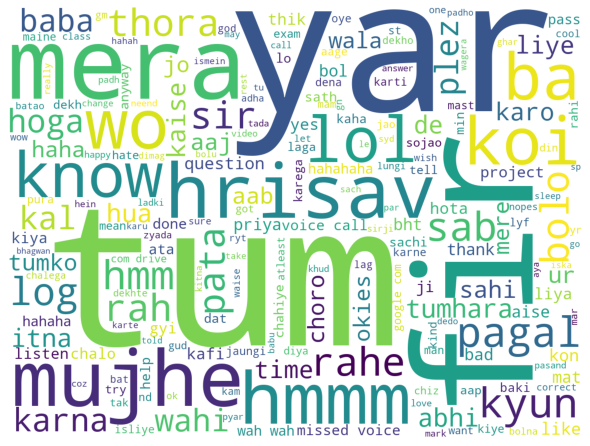

In [83]:
wc = WordCloud(
                              background_color='white',
                              stopwords=stopwords,
                              width=1200,
                              height=900,
                              max_words=200,
                             )
wc.generate(mansha)

plt.figure( figsize=(12,6), facecolor=None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### What do I talk about?

In [84]:
hrisav = df_clean[(df_clean['Name'] == 'Hrisav')][['Message1']]['Message1'].to_string()

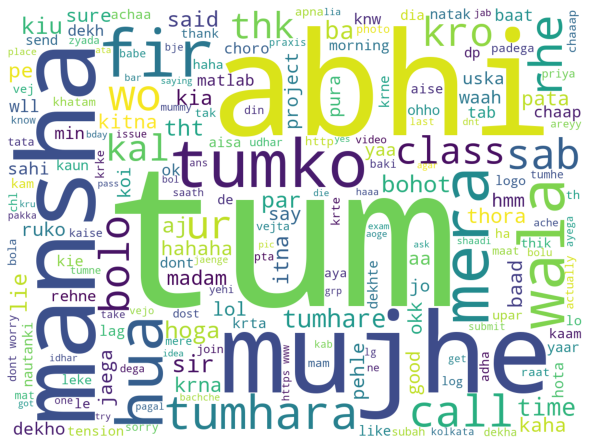

In [85]:
wc = WordCloud(
                              background_color='white',
                              stopwords=stopwords,
                              width=1200,
                              height=900,
                              max_words=200,
                             )
wc.generate(hrisav)

plt.figure( figsize=(12,6), facecolor=None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### What do we both talk about?

In [91]:
text = df_clean['Message1'].to_string()

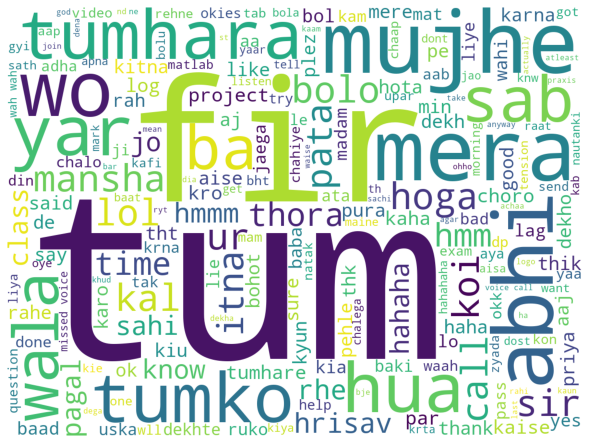

In [92]:
wc = WordCloud(
                              background_color='white',
                              stopwords=stopwords,
                              width=1200,
                              height=900,
                              max_words=200,
                             )
wc.generate(text)

plt.figure( figsize=(12,6), facecolor=None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Bigrams

In [88]:
raw = []
for word in df_clean['Message']:
    token = nltk.word_tokenize(str(word).lower())
    raw.extend(token)

In [89]:
l1 = [w for w in raw if w not in stopwords and w not in string.punctuation]

In [90]:
from collections import Counter

bigrams = zip(l1, l1[1:])
counts = Counter(bigrams)
print(counts.most_common(5))

[(('wah', 'wah'), 22), (('missed', 'voice'), 22), (('voice', 'call'), 22), (('dont', 'worry'), 17), (('u', 'said'), 15)]


Checking out the consecutive words we say.